# Import libraries
We start by importing the necessary libraries for data manipulation, visualization and analysis.

In [96]:
# Data management libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset
The dataset used in this project was sourced from Kaggle:   
[Cafe Sales - Dirty Data for Cleaning Training](https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training)

In [97]:
# Load the dataset
data = pd.read_csv('dirty_cafe_sales.csv', sep=';')

# Quick look at the data
data.head(10)

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,08/09/2023
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,16/05/2023
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,19/07/2023
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,27/04/2023
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,11/06/2023
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,31/03/2023
6,TXN_4433211,UNKNOWN,3,3.0,9.0,ERROR,Takeaway,06/10/2023
7,TXN_6699534,Sandwich,4,4.0,16.0,Cash,UNKNOWN,28/10/2023
8,TXN_4717867,NaN,5,3.0,15.0,NaN,Takeaway,28/07/2023
9,TXN_2064365,Sandwich,5,4.0,20.0,NaN,In-store,31/12/2023


Inspect the shape of the dataset to see its dimensions.

In [98]:
print('Data dimensions')
print('Number of columns:', data.shape[1])
print('Number of rows:', data.shape[0])

Data dimensions
Number of columns: 8
Number of rows: 10000


Check for missing values (count and percentage) in each column.

In [99]:
def missing_values(dataset):
    mv_count = dataset.isnull().sum()
    mv_perc = dataset.isnull().mean() * 100

    mv_sum = pd.DataFrame({
    'Missing Values': mv_count,
    'Percentage': mv_perc
    })

    print(mv_sum)

In [100]:
missing_values(data)

                  Missing Values  Percentage
Transaction ID                 0        0.00
Item                         333        3.33
Quantity                     138        1.38
Price Per Unit               179        1.79
Total Spent                  173        1.73
Payment Method              2579       25.79
Location                    3265       32.65
Transaction Date             159        1.59


There are missing values en every column except for 'Transaction ID'. Some columns have a very high percentage of missing data, which needs to be carefully considered during data cleaning.

Remove possible duplicates rows.

In [102]:
data.drop_duplicates(inplace=True)
print('Number of rows:', data.shape[0])

Number of rows: 10000


The number of rows remains the same; therefore, there were no duplicated rows.

When inspecting the first rows of the dataset, we noticed some entries labeled as 'ERROR' and 'UNKNOWN'. We will now check whether more such values exist.

In [103]:
for col in data.columns[1:7]:
    print(f"{col}: {data[col].unique()}")

Item: ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']
Quantity: ['2' '4' '5' '3' '1' 'ERROR' 'UNKNOWN' nan]
Price Per Unit: ['2.0' '3.0' '1.0' '5.0' '4.0' '1.5' nan 'ERROR' 'UNKNOWN']
Total Spent: ['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']
Payment Method: ['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]
Location: ['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']


There aren't any other invalid labels, so we'll replace them with NAN for further analysis.

In [104]:
invalid_values = ['ERROR', 'UNKNOWN']

data.replace(invalid_values, np.nan, inplace=True)

We check for missing values again after replacing the invalid labels.

In [105]:
missing_values(data)

                  Missing Values  Percentage
Transaction ID                 0        0.00
Item                         969        9.69
Quantity                     479        4.79
Price Per Unit               533        5.33
Total Spent                  502        5.02
Payment Method              3178       31.78
Location                    3961       39.61
Transaction Date             460        4.60


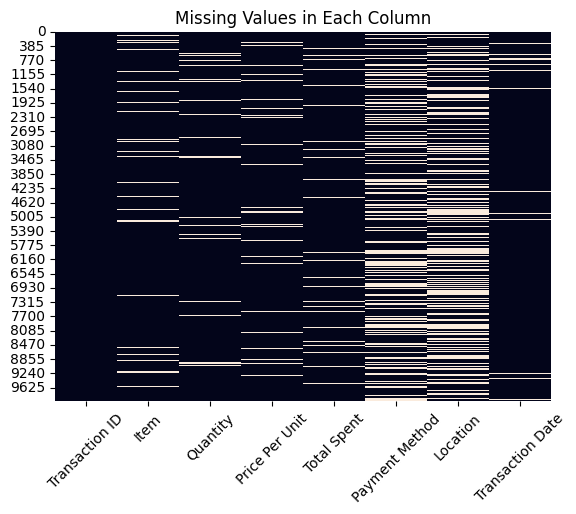

In [106]:
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Values in Each Column')
plt.xticks(rotation=45)
plt.show()

Get an overview of the dataset's structure and data type.

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9031 non-null   object
 2   Quantity          9521 non-null   object
 3   Price Per Unit    9467 non-null   object
 4   Total Spent       9498 non-null   object
 5   Payment Method    6822 non-null   object
 6   Location          6039 non-null   object
 7   Transaction Date  9540 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


We found that all variables have been read as 'object', even though some are numeric or date type. Therefore, they need to be converted to their correct data types.

In [108]:
# Convert date column to datetime
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'], dayfirst=True, errors="coerce")

# Convert all relevant columns to numeric
numeric_col = ['Quantity', 'Price Per Unit', 'Total Spent']
for col in numeric_col:
    data[col] = pd.to_numeric(data[col])

Display basic descriptive statistics for numeric features of the dataset, inluding count, mean, standard deviation, min, max and quartiles.

In [109]:
data.describe()

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,9521.000000,9467.000000,9498.000000,9540
mean,3.028463,2.949984,8.924352,2023-07-01 23:00:31.698113280
min,1.000000,1.000000,1.000000,2023-01-01 00:00:00
25%,2.000000,2.000000,4.000000,2023-04-01 00:00:00
50%,3.000000,3.000000,8.000000,2023-07-02 00:00:00
75%,4.000000,4.000000,12.000000,2023-10-02 00:00:00
max,5.000000,5.000000,25.000000,2023-12-31 00:00:00
std,1.419007,1.278450,6.009919,NaN


# Missing Values Imputation

Since we known the price of each item, we will impute the missing values with their correspondent value. However, some products share the same price (Sandwich and Smoothie, Juice and Cake), so we cannot determine which item it should have been. To address this, we will impute the missing value with the most frecuent item for each prices.

In [110]:
data['Item'].value_counts()

Item
Juice       1171
Coffee      1165
Salad       1148
Cake        1139
Sandwich    1131
Smoothie    1096
Cookie      1092
Tea         1089
Name: count, dtype: int64

Among the items that cost $4, *Sandwiches* are the most frecuent, while among item that cost $3, *Juice* is the most frecuent. Therefore we will fill the missing values with this most common items.

In [111]:
# Dictionaries relating price and item

item_price = {
    'Coffee': 2,
    'Tea': 1.5,
    'Sandwich': 4,
    'Salad': 5,
    'Cake':	3,
    'Cookie': 1,
    'Smoothie':	4,
    'Juice': 3,
}

price_item = {
    2: 'Coffee',
    1.5: 'Tea',
    5: 'Salad',
    1: 'Cookie',
    3: 'Juice',
    4: 'Sandwich'
}

In [112]:
# Fill missing 'Price Per Unit' values by mapping from the 'Item' column
price_nan = data['Price Per Unit'].isna()
data.loc[price_nan, 'Price Per Unit'] = data.loc[price_nan, 'Item'].map(item_price)

Since 'Total Spent' is calculated by multiplying 'Price Per Unit' and 'Quantity' of items, we will fill the missing values in this three columns.

In [113]:
data['Total Spent'] = data['Total Spent'].fillna(data['Price Per Unit'] * data['Quantity'])
data['Price Per Unit'] = data['Price Per Unit'].fillna(data['Total Spent'] / data['Quantity'])
data['Quantity'] = data['Quantity'].fillna(data['Total Spent'] / data['Price Per Unit'])

In [114]:
# Fill missing 'Item' values by mapping from the 'Price Per Unit' column
item_nan = data['Item'].isna()
data.loc[item_nan, 'Item'] = data.loc[item_nan, 'Price Per Unit'].map(price_item)

Verify that each product's price is recorded correctly.

In [115]:
# Create a new column mapping from the 'Item' column
correct_price = data['Item'].map(item_price)

In [116]:
# Check if they are equal
pd.Series.equals(correct_price, data['Price Per Unit']) # True

True

All product's prices are recorded correctly.

Since missing values in 'Location' and 'Payment Method' exeed 30% of the total data, there is no reliable method to impute them. Therefore, we will create a new category, 'Unknown', in both features to account for this situation.

In [117]:
data['Location'] = data['Location'].fillna('Unknown')
data['Payment Method'] = data['Payment Method'].fillna('Unknown')

Since 'Transaction Date' has only a 4.6% missing values and the dataset it is not order by date, making it impossible to use nearby dates for imputation, we will remove the rows with missing dates.

In [118]:
data = data.dropna(subset=['Transaction Date'])

Next, we order the dataset by 'Transaction Date'.

In [119]:
data.sort_values('Transaction Date', inplace=True)

We check for missing values again after all the transformations.

In [120]:
missing_values(data)

                  Missing Values  Percentage
Transaction ID                 0    0.000000
Item                           6    0.062893
Quantity                      23    0.241090
Price Per Unit                 6    0.062893
Total Spent                   23    0.241090
Payment Method                 0    0.000000
Location                       0    0.000000
Transaction Date               0    0.000000


# Feature Engineering 
We will create new columns from the datset's features that provide additional useful information.

A feature that differentiates beetween Beverage and Food: which one generates more revenue?

In [121]:
type_item = {
    'Coffee': 'Beverage',
    'Tea': 'Beverage',
    'Sandwich': 'Food',
    'Salad': 'Food',
    'Cake':	'Food',
    'Cookie': 'Food',
    'Smoothie':	'Beverage',
    'Juice': 'Beverage',
}

In [122]:
data['Item Type'] = data['Item'].map(type_item)

Created new date-related features such as the transaction's month name, day of the week (number and name), quarter number and whether it occured on a weekend.

In [123]:
# Month name column
data['Month'] = data['Transaction Date'].dt.month_name()

# Day of the week name column
data['Day Number'] = data['Transaction Date'].dt.dayofweek
data['Day Name'] = data['Transaction Date'].dt.day_name()

# Weekend or not
data['Week-end'] = data['Day Name'].isin(['Saturday', 'Sunday'])

# Quarter of the year
data['Quarter'] = data['Transaction Date'].dt.quarter

# Data Visualization
We plot the distribution of numeric and categorical features to explore their frecuency.

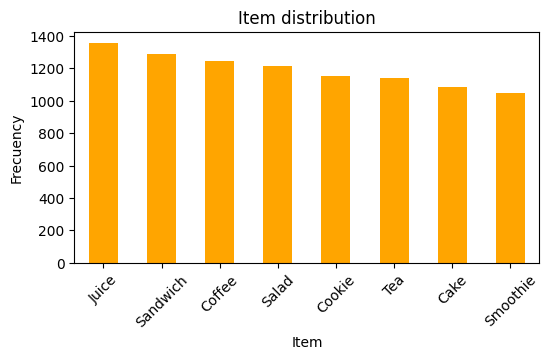

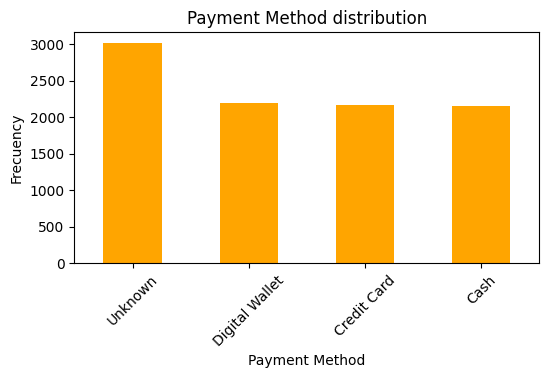

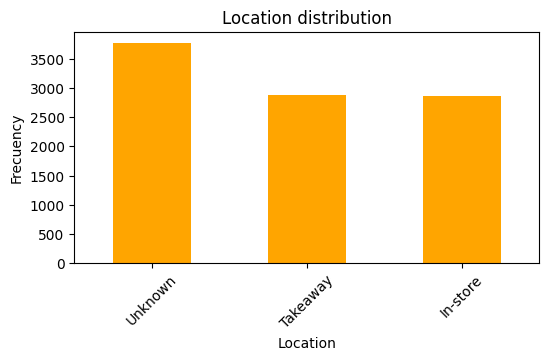

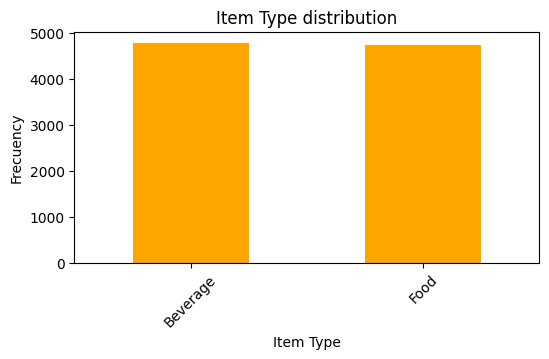

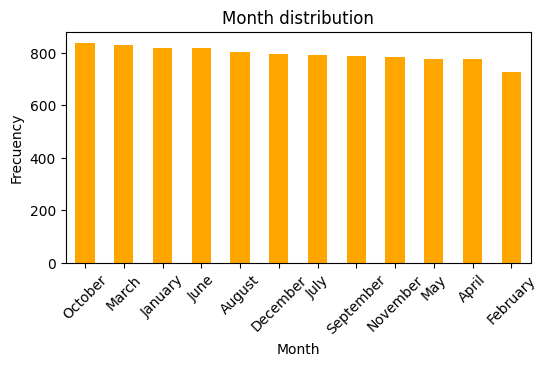

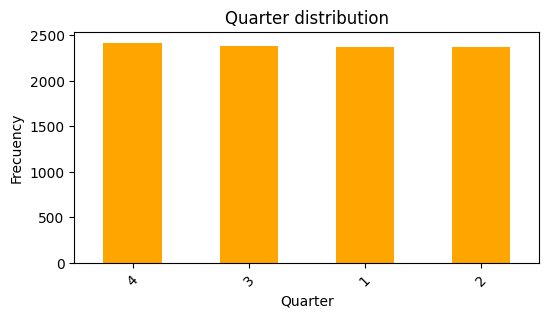

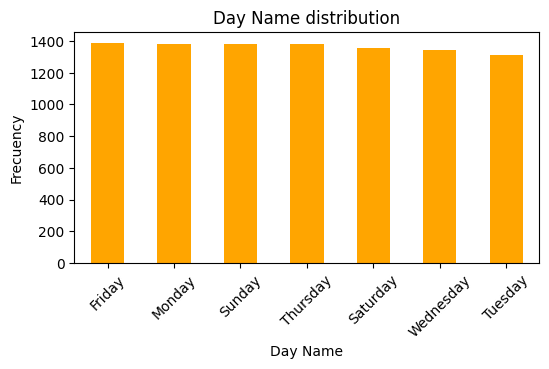

In [124]:
graf_col = ['Item', 'Payment Method', 'Location', 'Item Type', 'Month', 'Quarter', 'Day Name']
for col in graf_col:
    col_count = data[col].value_counts()
    plt.figure(figsize=(6, 3))
    col_count.plot(kind='bar', color='orange')
    title = col + ' distribution'
    plt.title(title)
    plt.ylabel('Frecuency')
    plt.xticks(rotation=45)
    plt.show()

Both in 'Payment Method' and 'Location', the category 'Unknown' Is the most frecuent in the dataset.

Next, we calculate the total revenue and total quantity of each item, as well as the item type (food or beverage).

In [125]:
item_sales = data.groupby('Item')['Total Spent'].sum()
item_quant = data.groupby('Item')['Quantity'].sum()
item_type_sales = data.groupby('Item Type')['Total Spent'].sum()

Then we visualize these statistics for comparison.

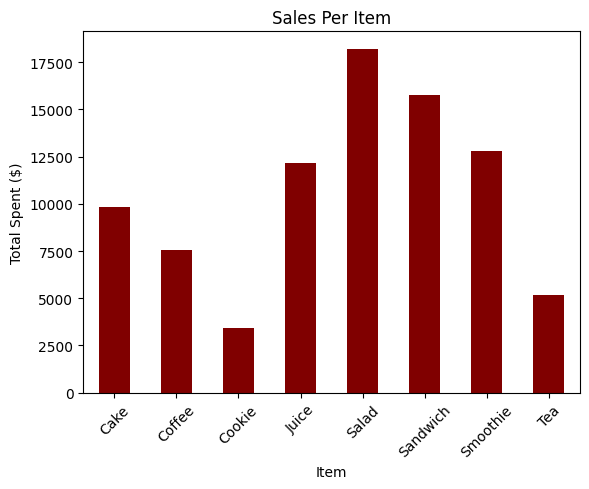

In [126]:
plt.figure(figsize=(6,5))
item_sales.plot(kind='bar', color='maroon')
plt.title('Sales Per Item')
plt.ylabel('Total Spent ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Salad* is the most profitable item.

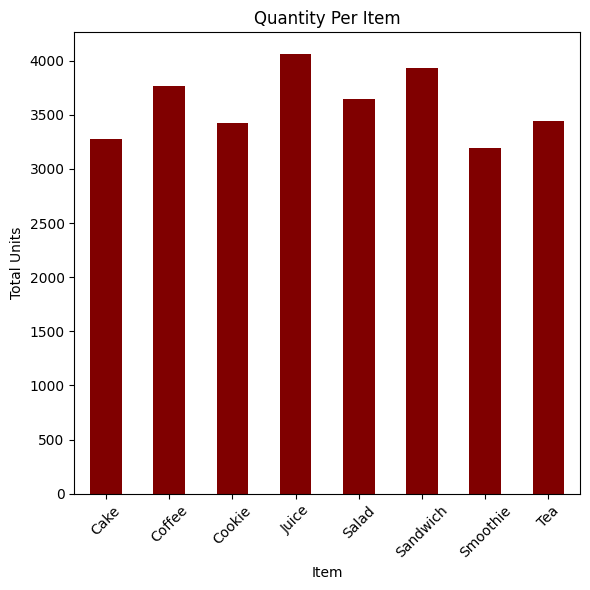

In [127]:
plt.figure(figsize=(6,6))
item_quant.plot(kind='bar', color='maroon')
plt.title('Quantity Per Item')
plt.ylabel('Total Units')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

However, *Juice* is the most purchased item.

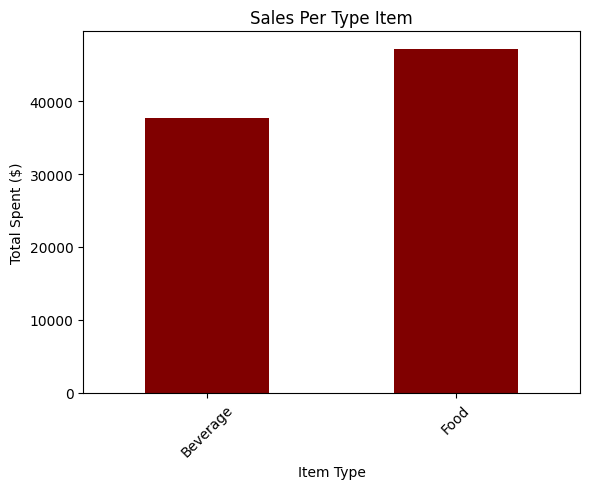

In [128]:
plt.figure(figsize=(6,5))
item_type_sales.plot(kind='bar', color='maroon')
plt.title('Sales Per Type Item')
plt.ylabel('Total Spent ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Food items generated more profit than beverage items.

# Time Series Analysis
We analyze how revenue change over time, exploring trends and patterns in the dataset.

We calculated the total revenue daily, monthly, and for each day of the week.

In [129]:
# Aggregate total sales by day name
day_week_sales = data.groupby('Day Name')['Total Spent'].sum()

In [130]:
# Set 'OrderDate' as the dataset index fortime series operations
data.set_index('Transaction Date', inplace=True)

# Aggregate total sales by day
daily_sales = data['Total Spent'].resample('D').sum()

# Aggregate total sales by month
monthly_sales = data['Total Spent'].resample('M').sum()

data.reset_index(inplace=True)

Next, we visualize how the sales vary throughout the year and across the week.

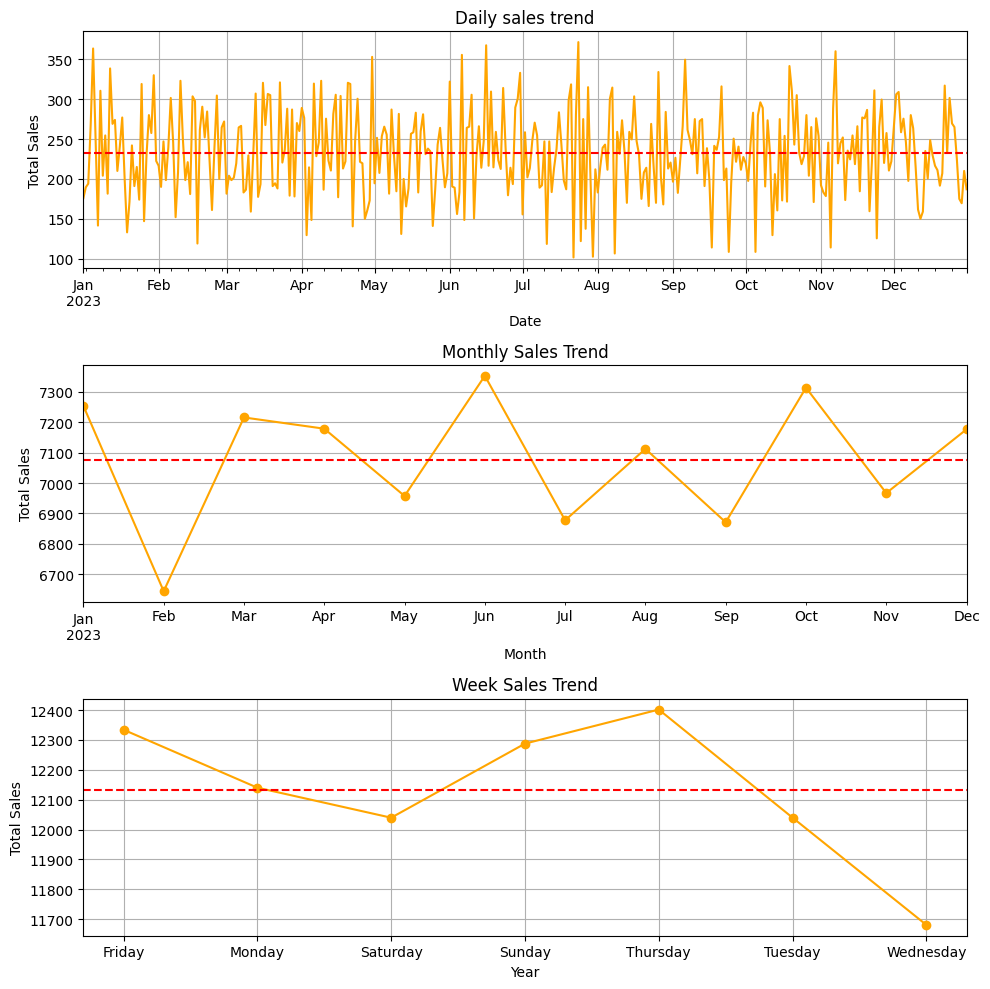

In [132]:
# Create 3 plots to visualize the distribution of total sales over time
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Daily sales trend
daily_sales.plot(ax=axes[0], color = 'orange')
axes[0].set_title("Daily sales trend")
axes[0].set_xlabel("Date")
axes[0].set_ylabel("Total Sales")
axes[0].grid(True)
axes[0].axhline(daily_sales.mean(), color='red', linestyle='--')


# Monthly sales trend
monthly_sales.plot(ax=axes[1], marker='o', color = "orange")
axes[1].set_title("Monthly Sales Trend")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Total Sales")
axes[1].grid(True)
axes[1].axhline(monthly_sales.mean(), color='red', linestyle='--')


# Yearly sales trend
day_week_sales.plot(ax=axes[2], marker = "o", color = 'orange')
axes[2].set_title("Week Sales Trend")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Total Sales")
axes[2].grid(True)
axes[2].axhline(day_week_sales.mean(), color='red', linestyle='--')

plt.tight_layout()
plt.show()

# Correlation Analysis
We analyze the relationship between features to identify possible patterns and dependencies.

In order to include categorical features in the analysis, we need to encode them. However, to avoid modifying the original dataset, we will create a copy to work with. 

In [133]:
data_one_hot = data.copy()

Next, we encode the categorical features using one-hot encoding.

In [134]:
col_categ = ['Item', 'Payment Method', 'Location', 'Item Type']
data_one_hot = pd.get_dummies(data, columns=col_categ, drop_first=True)


Now we are ready to calculate the correlations between variables and visualize them in a heatmap for better understanding.

In [136]:
num = ['Price Per Unit', 'Total Spent', 'Quantity', 'Day Number', 'Week-end', 'Quarter']

# We add all one-hot columns
one_hot_cols = [col for col in data_one_hot.columns if '_' in col and col not in num]

num += one_hot_cols

# Compute correlation matrix
corr = data_one_hot[num].corr()

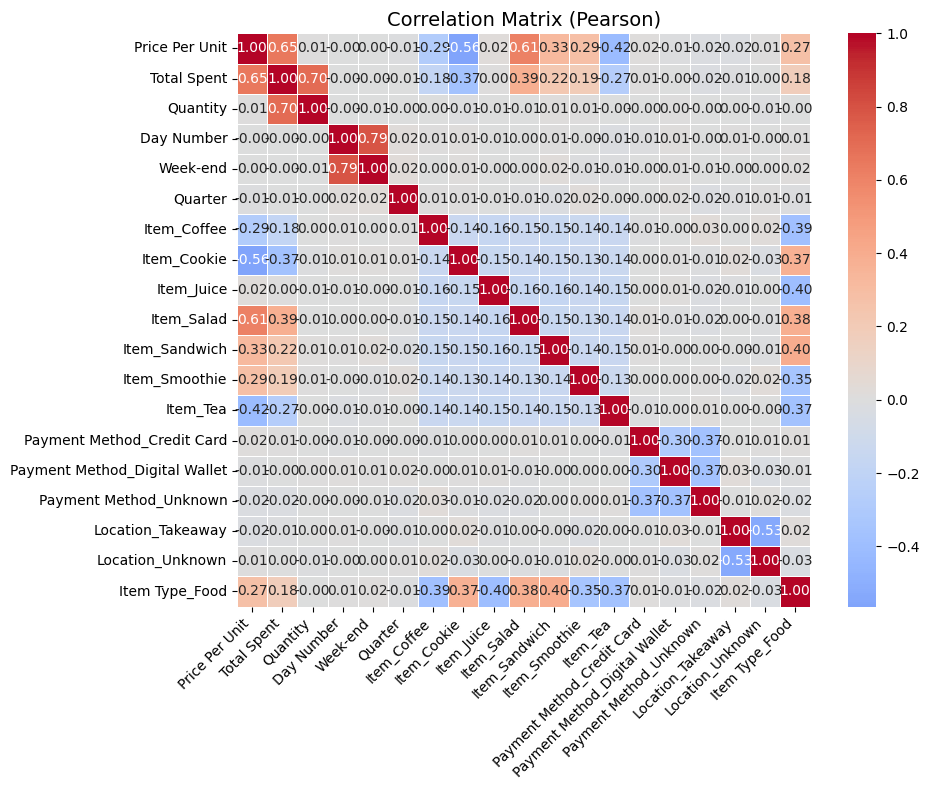

In [137]:
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            annot=True,         
            fmt=".2f",          
            cmap="coolwarm",
            center=0,        
            cbar=True,          
            square=True,        
            linewidths=0.5)     

plt.title("Correlation Matrix (Pearson)", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [138]:
# Correlation matrix
print(corr)

                               Price Per Unit  Total Spent  Quantity  \
Price Per Unit                       1.000000     0.645986  0.006676   
Total Spent                          0.645986     1.000000  0.704489   
Quantity                             0.006676     0.704489  1.000000   
Day Number                          -0.000279    -0.000793 -0.002801   
Week-end                             0.001644    -0.001984 -0.005439   
Quarter                             -0.013282    -0.007373 -0.003905   
Item_Coffee                         -0.287562    -0.184011  0.003632   
Item_Cookie                         -0.564514    -0.366527 -0.010108   
Item_Juice                           0.016376     0.004156 -0.007602   
Item_Salad                           0.613224     0.387414 -0.005300   
Item_Sandwich                        0.325311     0.217932  0.010288   
Item_Smoothie                        0.288873     0.192547  0.007970   
Item_Tea                            -0.417795    -0.270370 -0.00

As expected, we don't find strong correlationss between most variable, except for 'Total Sales' with 'Quantity' and 'Price Per Unit' (since it is calculated from them), and between 'Total Sales' and 'Price per Unit' with the different items and item type.

# Descargamos dataset corregido

In [139]:
print(data.head(10))

  Transaction Date Transaction ID      Item  Quantity  Price Per Unit  \
0       2023-01-01    TXN_4801947     Juice       1.0             3.0   
1       2023-01-01    TXN_9161256  Smoothie       2.0             4.0   
2       2023-01-01    TXN_6093955       Tea       5.0             1.5   
3       2023-01-01    TXN_8842223  Sandwich       5.0             4.0   
4       2023-01-01    TXN_7367474     Juice       5.0             3.0   
5       2023-01-01    TXN_2690222     Juice       4.0             3.0   
6       2023-01-01    TXN_5728991     Salad       2.0             5.0   
7       2023-01-01    TXN_2192787  Sandwich       5.0             4.0   
8       2023-01-01    TXN_5563675       Tea       3.0             1.5   
9       2023-01-01    TXN_2104473      Cake       3.0             3.0   

   Total Spent  Payment Method  Location Item Type    Month  Day Number  \
0          3.0  Digital Wallet  Takeaway  Beverage  January           6   
1          8.0  Digital Wallet  In-store  Beve

In [107]:
data.to_csv('data limpia.csv', index=False)